In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 frog  ship  frog truck


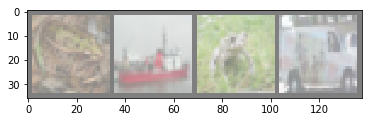

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
imshow(torchvision.utils.make_grid(images))

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 3x32x32 -> 6x28x32
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 6x32x32 -> 6x16x16
        self.pool = nn.MaxPool2d(2, 2)
        # 6x16x16 -> 16x16x16
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
        x = self.fc1(x)
        return x


net = Net()

In [8]:
inp = torch.randn(1,3,32,32)
out = net(inp)

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
from tqdm import tqdm

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total=50000/4):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

 16%|█▋        | 2035/12500.0 [00:11<00:58, 178.85it/s]

[1,  2000] loss: 2.144


 32%|███▏      | 4034/12500.0 [00:22<00:43, 195.27it/s]

[1,  4000] loss: 1.824


 48%|████▊     | 6029/12500.0 [00:33<00:33, 190.65it/s]

[1,  6000] loss: 1.689


 64%|██████▍   | 8036/12500.0 [00:43<00:22, 200.53it/s]

[1,  8000] loss: 1.624


 80%|████████  | 10031/12500.0 [00:54<00:13, 178.38it/s]

[1, 10000] loss: 1.583


 96%|█████████▌| 12024/12500.0 [01:08<00:03, 137.29it/s]

[1, 12000] loss: 1.538


100%|██████████| 12500/12500.0 [01:11<00:00, 175.68it/s]
 16%|█▌        | 2026/12500.0 [00:11<00:52, 200.87it/s]

[2,  2000] loss: 1.499


 32%|███▏      | 4018/12500.0 [00:24<00:47, 176.78it/s]

[2,  4000] loss: 1.503


 48%|████▊     | 6028/12500.0 [00:35<00:33, 192.89it/s]

[2,  6000] loss: 1.483


 64%|██████▍   | 8031/12500.0 [00:46<00:23, 188.54it/s]

[2,  8000] loss: 1.464


 80%|████████  | 10013/12500.0 [00:58<00:18, 135.24it/s]

[2, 10000] loss: 1.436


 96%|█████████▋| 12034/12500.0 [01:09<00:02, 181.57it/s]

[2, 12000] loss: 1.418


100%|██████████| 12500/12500.0 [01:11<00:00, 174.45it/s]

Finished Training


In [11]:
outputs.shape

torch.Size([4, 10])

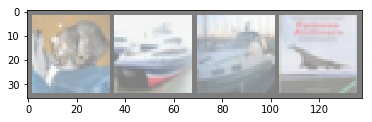

GroundTruth:    cat  ship  ship plane


In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
outputs = net(images)

In [16]:
images.shape

torch.Size([4, 3, 32, 32])

In [17]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car  ship


In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 50 %


In [19]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 71 %
Accuracy of  bird : 35 %
Accuracy of   cat : 30 %
Accuracy of  deer : 27 %
Accuracy of   dog : 34 %
Accuracy of  frog : 73 %
Accuracy of horse : 55 %
Accuracy of  ship : 56 %
Accuracy of truck : 51 %


In [ ]:
torch.save(net, 'model.pt')

In [ ]:
dummy_input = torch.randn(1, 3, 32, 32)
torch.onnx.export(net, dummy_input, 'model.onnx')

In [ ]:
torch.save(net, 'model.pt')

In [ ]:
import numpy as np
import cv2 as cv

In [ ]:
model = cv.dnn.readNetFromONNX('model.onnx')

In [ ]:
img = np.array(images[2,:,:,:])
plt.imshow(img[0,:,:])
plt.show()

In [ ]:
import skimage
import skimage.io

In [ ]:
img = img.swapaxes(0,2)

In [ ]:
img.shape

In [ ]:
skimage.io.imsave('image.png', img)

In [ ]:
img = img.reshape(1,3,32,32)
img.shape

In [ ]:
model.setInput(img)
res = model.forward()

In [ ]:
res[0]

In [ ]:
classes